**Aggregate Climate Data Reading**

This file takes NOAA GSOM data, consisting of a large number of individual csv files, and compiles relevant information into a single csv file containing cleaned data.

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import wget

First, to obtain the NOAA GSOY dataset

In [422]:
wget.download('https://www.ncei.noaa.gov/data/global-summary-of-the-year/archive/gsoy-latest.tar.gz')

'gsoy-latest.tar.gz'

In [ ]:
import tarfile

file = tarfile.open('gsoy-latest.tar.gz')
file.extractall('./gsoy-latest')
file.close()

C:\Users\Matthew Dannenberg\AppData\Local\Temp\ipykernel_25344\1564367534.py:4: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  file.extractall('./gsoy')


For comprehensibility's sake, we'll first grab a list of attributes out of a provided sample file

In [3]:
root = os.getcwd()
sample_df = pd.read_csv(root + "\\gsoy_sample_csv.csv")
print(sample_df)

root += '\\gsoy-latest'
files = os.listdir(root)

       STATION                                    NAME  LATITUDE  LONGITUDE  \
0  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US   43.1167   -77.6767   
1  USC00309049                     WEBSTER 2 NE, NY US   43.2419   -77.3882   

   ELEVATION  DATE  CLDD CLDD_ATTRIBUTES  HTDD HTDD_ATTRIBUTES  ...  AWND  \
0      164.3  2015   376               W  3834               W  ...   8.9   
1       83.8  2015   319               7  3914               7  ...   NaN   

  AWND_ATTRIBUTES   WDF2 WDF2_ATTRIBUTES   WDF5 WDF5_ATTRIBUTES  WSF2  \
0               W  250.0               W  270.0               W  42.9   
1             NaN    NaN             NaN    NaN             NaN   NaN   

  WSF2_ATTRIBUTES  WSF5 WSF5_ATTRIBUTES  
0               W  57.9               W  
1             NaN   NaN             NaN  

[2 rows x 78 columns]


In [4]:
attributes = sample_df.columns
print(attributes)

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'CLDD',
       'CLDD_ATTRIBUTES', 'HTDD', 'HTDD_ATTRIBUTES', 'DX32', 'DX32_ATTRIBUTES',
       'DX70', 'DX70_ATTRIBUTES', 'DX90', 'DX90_ATTRIBUTES', 'DT00',
       'DT00_ATTRIBUTES', 'DT32', 'DT32_ATTRIBUTES', 'DP01', 'DP01_ATTRIBUTES',
       'DP05', 'DP05_ATTRIBUTES', 'DP10', 'DP10_ATTRIBUTES', 'FZF2',
       'FZF2_ATTRIBUTES', 'FZF1', 'FZF1_ATTRIBUTES', 'FZF0', 'FZF0_ATTRIBUTES',
       'FZF9', 'FZF9_ATTRIBUTES', 'FZF8', 'FZF8_ATTRIBUTES', 'FZF7',
       'FZF7_ATTRIBUTES', 'FZF6', 'FZF6_ATTRIBUTES', 'FZF5', 'FZF5_ATTRIBUTES',
       'EMXP', 'EMXP_ATTRIBUTES', 'EMSD', 'EMSD_ATTRIBUTES', 'EMSN',
       'EMSN_ATTRIBUTES', 'DSND', 'DSND_ATTRIBUTES', 'DSNW', 'DSNW_ATTRIBUTES',
       'PRCP', 'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'CDSD',
       'CDSD_ATTRIBUTES', 'EMXT', 'EMXT_ATTRIBUTES', 'EMNT', 'EMNT_ATTRIBUTES',
       'HDSD', 'HDSD_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN',
       'TMIN_ATTRIBUTES', 

In [ ]:
all_dfs = []
for filename in files:
    if filename[0:2] == "US":
        path = root + "\\" + filename
        new_df = pd.read_csv(path)
        print(filename + ' completed')
        all_dfs.append(new_df)

df = pd.concat(all_dfs)

US009052008.csv completed
US10adam002.csv completed
US10adam004.csv completed
US10adam006.csv completed
US10adam008.csv completed
US10adam010.csv completed
US10adam017.csv completed
US10adam022.csv completed
US10adam032.csv completed
US10adam036.csv completed
US10adam051.csv completed
US10adam056.csv completed
US10ante003.csv completed
US10bann007.csv completed
US10bann009.csv completed
US10boon005.csv completed
US10boon006.csv completed
US10boon009.csv completed
US10boon010.csv completed
US10box_001.csv completed
US10box_003.csv completed
US10box_004.csv completed
US10box_006.csv completed
US10box_008.csv completed
US10box_014.csv completed
US10brow004.csv completed
US10brow008.csv completed
US10buff002.csv completed
US10buff004.csv completed
US10buff006.csv completed
US10buff007.csv completed
US10buff008.csv completed
US10buff010.csv completed
US10buff013.csv completed
US10buff015.csv completed
US10buff034.csv completed
US10buff036.csv completed
US10burt002.csv completed
US10butl003.

In [6]:
df = df.reset_index()
df

index      STATION  DATE  LATITUDE  LONGITUDE  ELEVATION  \
0           0  US009052008  2009   43.7333   -96.6333      482.0   
1           1  US009052008  2010   43.7333   -96.6333      482.0   
2           2  US009052008  2011   43.7333   -96.6333      482.0   
3           3  US009052008  2012   43.7333   -96.6333      482.0   
4           4  US009052008  2013   43.7333   -96.6333      482.0   
...       ...          ...   ...       ...        ...        ...   
922673      2  USW00096409  2020   68.6483  -149.3986      750.1   
922674      3  USW00096409  2021   68.6483  -149.3986      750.1   
922675      4  USW00096409  2022   68.6483  -149.3986      750.1   
922676      5  USW00096409  2023   68.6483  -149.3986      750.1   
922677      6  USW00096409  2024   68.6483  -149.3986      750.1   

                                      NAME   CDSD  CDSD_ATTRIBUTES   CLDD  \
0       SIOUX FALLS ENVIRON. CANADA, SD US  184.3              NaN  184.3   
1       SIOUX FALLS ENVIRON. CANADA, SD US  344.1              NaN  344.1   
2       SIOUX FALLS ENVIRON. CANADA, SD US  370.3              NaN  370.3   
3       SIOUX FALLS ENVIRON. CANADA, SD US  538.1              NaN  538.1   
4       SIOUX FALLS ENVIRON. CANADA, SD US  366.8              NaN  366.8   
...                                    ...    ...              ...    ...   
922673            TOOLIK LAKE 5 ENE, AK US    0.0              NaN    0.0   
922674            TOOLIK LAKE 5 ENE, AK US    0.0              NaN    0.0   
922675            TOOLIK LAKE 5 ENE, AK US    0.0              NaN    0.0   
922676            TOOLIK LAKE 5 ENE, AK US    0.0              NaN    0.0   
922677            TOOLIK LAKE 5 ENE, AK US    1.2              NaN    1.2   

        ... MX07  MX07_ATTRIBUTES MX08  MX08_ATTRIBUTES HN09  HN09_ATTRIBUTES  \
0       ...  NaN              NaN  NaN              NaN  NaN              NaN   
1       ...  NaN              NaN  NaN              NaN  NaN              NaN   
2       ...  NaN              NaN  NaN              NaN  NaN              NaN   
3       ...  NaN              NaN  NaN              NaN  NaN              NaN   
4       ...  NaN              NaN  NaN              NaN  NaN              NaN   
...     ...  ...              ...  ...              ...  ...              ...   
922673  ...  NaN              NaN  NaN              NaN  NaN              NaN   
922674  ...  NaN              NaN  NaN              NaN  NaN              NaN   
922675  ...  NaN              NaN  NaN              NaN  NaN              NaN   
922676  ...  NaN              NaN  NaN              NaN  NaN              NaN   
922677  ...  NaN              NaN  NaN              NaN  NaN              NaN   

       LN09  LN09_ATTRIBUTES MN09  MN09_ATTRIBUTES  
0       NaN              NaN  NaN              NaN  
1       NaN              NaN  NaN              NaN  
2       NaN              NaN  NaN              NaN  
3       NaN              NaN  NaN              NaN  
4       NaN              NaN  NaN              NaN  
...     ...              ...  ...              ...  
922673  NaN              NaN  NaN              NaN  
922674  NaN              NaN  NaN              NaN  
922675  NaN              NaN  NaN              NaN  
922676  NaN              NaN  NaN              NaN  
922677  NaN              NaN  NaN              NaN  

[922678 rows x 217 columns]

Before we get underway, let's see a quick scatterplot of where these data points are located in the US.

In [66]:
wget.download('https://www2.census.gov/geo/tiger/GENZ2024/shp/cb_2024_us_state_5m.zip')

'cb_2024_us_state_5m.zip'

In [75]:
states = gpd.read_file('cb_2024_us_state_5m.zip')
#states

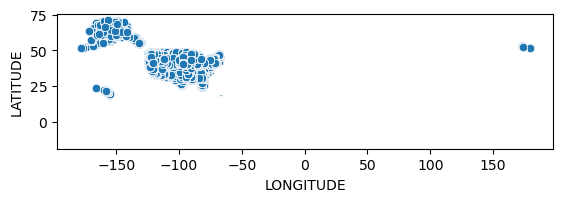

In [76]:
states.plot()
sns.scatterplot(df, x='LONGITUDE', y='LATITUDE')
plt.show()

That plot not being wildly useful, let's start by removing points outside the continental US.

C:\Users\Matthew Dannenberg\AppData\Local\Temp\ipykernel_25344\2249113094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STATE'] = df['NAME'].map(lambda x: x[-5:-3], na_action = 'ignore')


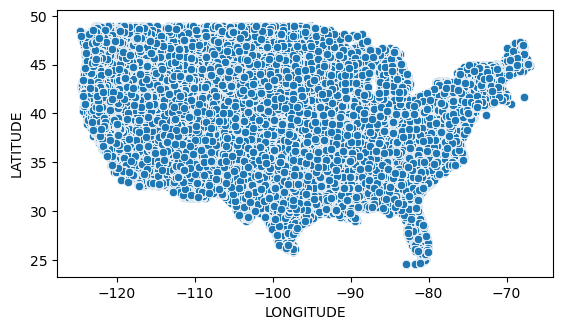

In [82]:
states_to_remove = ['VI', 'MP', 'AK','HI','PR','AS', 'GU']
states = states[~states['STUSPS'].isin(states_to_remove)]
states.plot()

df['STATE'] = df['NAME'].map(lambda x: x[-5:-3], na_action = 'ignore')
df = df[~df['STATE'].isin(states_to_remove)]
sns.scatterplot(df, x='LONGITUDE', y='LATITUDE')

plt.show()

The NOAA dataframe we're using has a large number of features, however the vast majority stations do not actually report values for many of them. As such, we'll eliminate a large number of features from the get-go

In [90]:
df = pd.concat([df[df.columns[:-139]],df[df.columns[-1:]]],axis=1)

The most naive way to select data is to simply delete rows that have NaNs in features we care about. This process deletes a lot of information, so we'll rename the dataframe so as to keep the old one around in case it is needed. We'll work with a truncated data frame instead. The code block below scans one feature at a time, deleting entries with NaNs. A print statement tells us at which features more than 10% of the data is being lost.

In [196]:
columns_with_non_NaN = df.columns[7:-1:2]
tdf = df
num_rows = tdf.shape[0]
for i in columns_with_non_NaN:
    tdf = tdf[~tdf[i].isnull()]
    if tdf.shape[0] < num_rows * .9:
        print(str(i) + ' ' + str(tdf.shape[0]))
        num_rows = tdf.shape[0]
tdf = pd.concat([tdf[tdf.columns[1:7]],tdf[tdf.columns[7:-1:2]],tdf[tdf.columns[-1]]],axis=1)
tdf

CDSD 441656
DP01 380726
FZF2 338325
FZF4 284041
HDSD 247658
DSND 146044
DSNW 130180
DYFG 63999
DYTS 57599


STATION  DATE   LATITUDE  LONGITUDE  ELEVATION  \
75311   USC00010163  1952  32.983330  -85.86667      200.9   
75315   USC00010163  1956  32.983330  -85.86667      200.9   
75316   USC00010163  1957  32.983330  -85.86667      200.9   
75321   USC00010163  1962  32.983330  -85.86667      200.9   
75501   USC00010260  2005  34.962850  -87.37195      231.6   
...             ...   ...        ...        ...        ...   
922404  USW00094985  2013  44.637900  -90.18755      381.5   
922406  USW00094985  2015  44.637900  -90.18755      381.5   
922570  USW00094993  2014  45.669018  -96.99183      353.0   
922571  USW00094993  2015  45.669018  -96.99183      353.0   
922575  USW00094993  2019  45.669018  -96.99183      353.0   

                                       NAME   CDSD   CLDD   DP01  DP10  ...  \
75311            ALEXANDER CITY 6 NE, AL US  939.3  939.3   96.0  75.0  ...   
75315            ALEXANDER CITY 6 NE, AL US  932.7  932.7  118.0  83.0  ...   
75316            ALEXANDER CITY 6 NE, AL US  992.2  992.2  135.0  88.0  ...   
75321            ALEXANDER CITY 6 NE, AL US  994.2  994.2  129.0  75.0  ...   
75501                      LEXINGTON, AL US  847.6  847.6  113.0  68.0  ...   
...                                     ...    ...    ...    ...   ...  ...   
922404  MARSHFIELD MUNICIPAL AIRPORT, WI US  266.0  266.0  131.0  67.0  ...   
922406  MARSHFIELD MUNICIPAL AIRPORT, WI US  250.4  250.4   96.0  53.0  ...   
922570    SISSETON MUNICIPAL AIRPORT, SD US  234.3  234.3  100.0  43.0  ...   
922571    SISSETON MUNICIPAL AIRPORT, SD US  339.6  339.6   92.0  43.0  ...   
922575    SISSETON MUNICIPAL AIRPORT, SD US  262.0  262.0  131.0  69.0  ...   

         TMAX   TMIN   DSND  DSNW   EMSD   EMSN    SNOW   DYFG  DYTS  STATE  
75311   24.35   9.07    0.0   0.0    0.0    0.0     0.0    2.0  34.0     AL  
75315   24.76   9.47    0.0   0.0    0.0    0.0     0.0    1.0  34.0     AL  
75316   24.34  10.53    0.0   0.0    0.0    0.0     0.0    2.0  39.0     AL  
75321   24.73   8.56    0.0   1.0    0.0   64.0    64.0    2.0  42.0     AL  
75501   21.39   9.01    0.0   0.0    0.0    0.0     0.0    4.0   4.0     AL  
...       ...    ...    ...   ...    ...    ...     ...    ...   ...    ...  
922404  10.76   0.35  124.0  33.0  430.0  236.0  2228.0  215.0   2.0     WI  
922406  13.00   2.37   82.0  10.0  280.0  178.0   874.0  186.0  33.0     WI  
922570  11.14  -0.39  102.0  11.0  250.0  152.0   961.0    1.0   5.0     SD  
922571  14.08   1.62   83.0  11.0  200.0  114.0   804.0    1.0   7.0     SD  
922575   9.77  -0.30  131.0  21.0  740.0  287.0  2052.0    7.0   4.0     SD  

[57599 rows x 43 columns]

Now, we'll limit our data to our years of concern - 1950-2024.

In [200]:
tdf = tdf.query('DATE >= 1950 and DATE <= 2024')

C:\Users\Matthew Dannenberg\AppData\Local\Temp\ipykernel_25344\3937005915.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


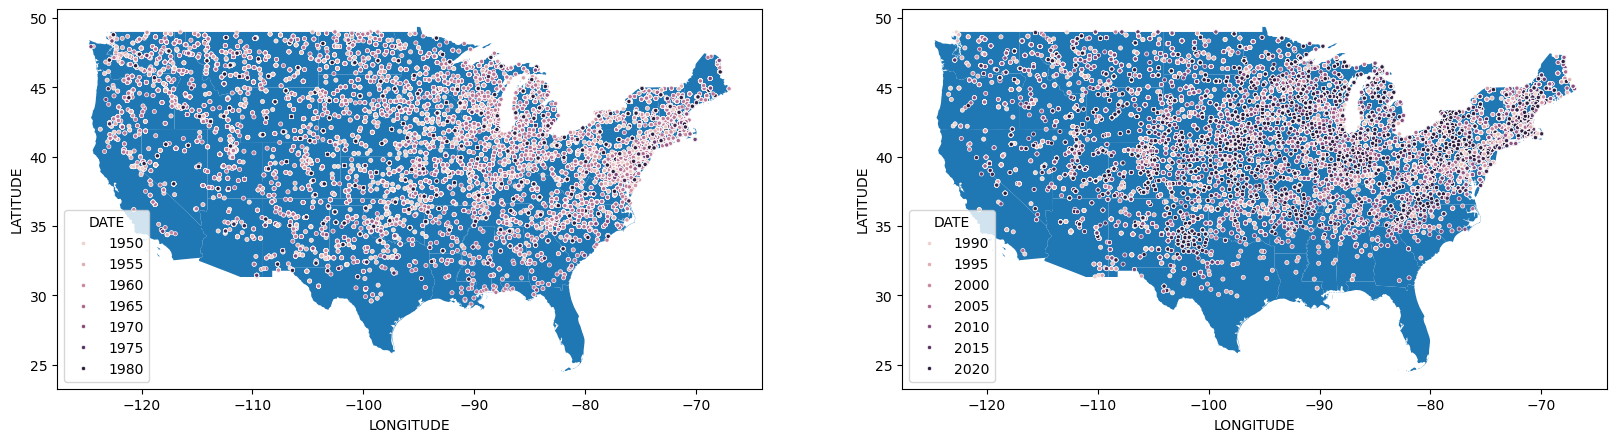

In [212]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(20,40)
ax1 = axs[0]
ax2 = axs[1]
states.plot(ax=ax1)
states.plot(ax=ax2)
sns.scatterplot(tdf.query('DATE <= 1980'), x='LONGITUDE', y='LATITUDE',marker='.',hue='DATE', ax=ax1)
sns.scatterplot(tdf.query('DATE >= 1990 and DATE <= 2020'), x='LONGITUDE', y='LATITUDE',marker='.',hue='DATE', ax=ax2)
fig.show()

While some regions of the US are well covered, notice how sparse data in other regions (such as the Southern US) are. Given that there is some intersection of tornado alley with these regions, this is not great.

Deleting that much information is undesirable. So instead, we'll use an interpolation scheme within any given year to fill in certain features with NaN entries. For example, given any datapoint with a NaN for TMIN, we'll take the nearest (in latitude-longitude) entries with non-NaN entries for TMIN and interpolate between their values to fill in the TMIN entry for our original datapoint.

In [396]:
filled_df = df.copy()
filled_df = filled_df[~filled_df.LATITUDE.isna()]
filled_df = filled_df[~filled_df.LONGITUDE.isna()]
filled_df

index      STATION  DATE  LATITUDE  LONGITUDE  ELEVATION  \
0           0  US009052008  2009   43.7333   -96.6333      482.0   
1           1  US009052008  2010   43.7333   -96.6333      482.0   
2           2  US009052008  2011   43.7333   -96.6333      482.0   
3           3  US009052008  2012   43.7333   -96.6333      482.0   
4           4  US009052008  2013   43.7333   -96.6333      482.0   
...       ...          ...   ...       ...        ...        ...   
922645     17  USW00094996  2020   40.6954   -96.8541      418.2   
922646     18  USW00094996  2021   40.6954   -96.8541      418.2   
922647     19  USW00094996  2022   40.6954   -96.8541      418.2   
922648     20  USW00094996  2023   40.6954   -96.8541      418.2   
922649     21  USW00094996  2024   40.6954   -96.8541      418.2   

                                      NAME   CDSD  CDSD_ATTRIBUTES   CLDD  \
0       SIOUX FALLS ENVIRON. CANADA, SD US  184.3              NaN  184.3   
1       SIOUX FALLS ENVIRON. CANADA, SD US  344.1              NaN  344.1   
2       SIOUX FALLS ENVIRON. CANADA, SD US  370.3              NaN  370.3   
3       SIOUX FALLS ENVIRON. CANADA, SD US  538.1              NaN  538.1   
4       SIOUX FALLS ENVIRON. CANADA, SD US  366.8              NaN  366.8   
...                                    ...    ...              ...    ...   
922645                LINCOLN 11 SW, NE US  598.1              NaN  598.1   
922646                LINCOLN 11 SW, NE US  668.7              NaN  668.7   
922647                LINCOLN 11 SW, NE US  724.6              NaN  724.6   
922648                LINCOLN 11 SW, NE US  662.8              NaN  662.8   
922649                LINCOLN 11 SW, NE US  627.3              NaN  627.3   

        ... EMSD_ATTRIBUTES  EMSN EMSN_ATTRIBUTES  SNOW SNOW_ATTRIBUTES  DYFG  \
0       ...             NaN   NaN             NaN   NaN             NaN   NaN   
1       ...             NaN   NaN             NaN   NaN             NaN   NaN   
2       ...             NaN   NaN             NaN   NaN             NaN   NaN   
3       ...             NaN   NaN             NaN   NaN             NaN   NaN   
4       ...             NaN   NaN             NaN   NaN             NaN   NaN   
...     ...             ...   ...             ...   ...             ...   ...   
922645  ...             NaN   NaN             NaN   NaN             NaN   NaN   
922646  ...             NaN   NaN             NaN   NaN             NaN   NaN   
922647  ...             NaN   NaN             NaN   NaN             NaN   NaN   
922648  ...             NaN   NaN             NaN   NaN             NaN   NaN   
922649  ...             NaN   NaN             NaN   NaN             NaN   NaN   

       DYFG_ATTRIBUTES  DYTS DYTS_ATTRIBUTES  STATE  
0                  NaN   NaN             NaN     SD  
1                  NaN   NaN             NaN     SD  
2                  NaN   NaN             NaN     SD  
3                  NaN   NaN             NaN     SD  
4                  NaN   NaN             NaN     SD  
...                ...   ...             ...    ...  
922645             NaN   NaN             NaN     NE  
922646             NaN   NaN             NaN     NE  
922647             NaN   NaN             NaN     NE  
922648             NaN   NaN             NaN     NE  
922649             NaN   NaN             NaN     NE  

[888207 rows x 80 columns]

In [397]:
from scipy.interpolate import LinearNDInterpolator

def linear_feature_interpolator(data,lat_feature,lon_feature,interp_feature):
    """
        Given a dataframe data, performs linear interpolation of the feature named interp_feature (a string). 
            lat_feature and lon_feature are strings giving the name of the features describing latitude and longitude.

            Values of interp_feature which are not NaN are associated with the corresponding latitude and longitude, and interpolation connects these values.
    
        Outputs a dataframe with the same size and contents as data, except in the feature interp_feature, 
        any values which are presently NaN are replaced with the value obtained from the interpolation procedure.
    """
    non_NaN_data = data[[lat_feature,lon_feature,interp_feature]][~data[interp_feature].isna()]
    interp = LinearNDInterpolator(non_NaN_data[[lat_feature,lon_feature]],non_NaN_data[interp_feature])

    data.loc[:,interp_feature] = interp(data[lat_feature],data[lon_feature])

    return data

In [398]:
features_to_interpolate = filled_df.columns[7:-1:2]
redundant_features = ['CDSD','HDSD','TAVG']
special_attributes = ['EMNT', 'EMXP', 'EMXT', 'EMSD', 'EMSN'] # The attributes for these features have extra, and potentially useful, information that we would need to handle with some care
date_features = ['FZF0', 'FZF1', 'FZF2', 'FZF3', 'FZF4', 'FZF5', 'FZF6', 'FZF7', 'FZF8', 'FZF9'] # The values for these features are dates, so we'll handle them separately
features_to_interpolate = features_to_interpolate.drop(redundant_features)
features_to_interpolate = features_to_interpolate.drop(special_attributes)
features_to_interpolate = features_to_interpolate.drop(date_features)
print(features_to_interpolate)

for feature in features_to_interpolate:
    # We need to convert the data in these features to a numeric format, rather than a string.
    filled_df[feature] = filled_df[feature].map(lambda x: float(x), na_action='ignore')

for year in range(1950,2025):
    year_df = filled_df[filled_df.DATE == year]
    for feature in features_to_interpolate:

        year_df = linear_feature_interpolator(year_df,'LATITUDE', 'LONGITUDE', feature)
    
    filled_df.loc[year_df.index] = year_df

    print(str(year) + ' completed')


Index(['CLDD', 'DP01', 'DP10', 'DP1X', 'DT00', 'DT32', 'DX32', 'DX70', 'DX90',
       'HTDD', 'PRCP', 'TMAX', 'TMIN', 'DSND', 'DSNW', 'SNOW', 'DYFG', 'DYTS'],
      dtype='object')
1950 completed
1951 completed
1952 completed
1953 completed
1954 completed
1955 completed
1956 completed
1957 completed
1958 completed
1959 completed
1960 completed
1961 completed
1962 completed
1963 completed
1964 completed
1965 completed
1966 completed
1967 completed
1968 completed
1969 completed
1970 completed
1971 completed
1972 completed
1973 completed
1974 completed
1975 completed
1976 completed
1977 completed
1978 completed
1979 completed
1980 completed
1981 completed
1982 completed
1983 completed
1984 completed
1985 completed
1986 completed
1987 completed
1988 completed
1989 completed
1990 completed
1991 completed
1992 completed
1993 completed
1994 completed
1995 completed
1996 completed
1997 completed
1998 completed
1999 completed
2000 completed
2001 completed
2002 completed
2003 completed
2004 comp

Following this process, a few points in the dataset still have NaN values for important features - if they don't fall in the convex hull of the set of points with non-NaN values. We'll simply exclude such points from the set.

In [410]:
output_df = filled_df.copy()

features_to_keep = features_to_interpolate

print("Initial shape: " + str(output_df.shape))

for feature in features_to_keep:
    output_df = output_df[~output_df[feature].isnull()]

output_df = pd.concat([output_df[['DATE','LATITUDE','LONGITUDE','ELEVATION','NAME']],output_df[features_to_keep]],axis = 1)
print("Reduced shape: " + str(output_df.shape))

Initial shape: (888207, 80)
Reduced shape: (688281, 23)


Finally, it's convenient to re-index the dataframe. We'll re-order it by date, then adjust the indices to match the new arrangement. We'll also explicitly remove all dates not between 1950 and 2024.

In [412]:
output_df = output_df.query('DATE >= 1950 and DATE <= 2024')

output_df = output_df.sort_values(by=['DATE'])

output_df = output_df.reset_index(drop=True)

output_df

DATE  LATITUDE  LONGITUDE  ELEVATION  \
0       1950  39.40000 -101.05000      958.0   
1       1950  40.07440  -75.31790       21.3   
2       1950  37.32126  -79.20649      274.9   
3       1950  37.41667  -84.60000      384.0   
4       1950  32.78220 -106.17590     1221.0   
...      ...       ...        ...        ...   
679559  2024  32.44730  -93.82440       69.5   
679560  2024  31.61796  -97.22830      151.9   
679561  2024  30.32080  -97.76040      204.2   
679562  2024  40.48360 -101.90510     1035.1   
679563  2024  36.04691 -115.18481      693.4   

                                            NAME         CLDD   DP01   DP10  \
0                                   COLBY, KS US   409.200000   67.0   39.0   
1                            CONSHOHOCKEN, PA US   434.186168  114.0   82.0   
2              LYNCHBURG REGIONAL AIRPORT, VA US   531.700000  141.0   90.0   
3                         WAYNESBURG 7 NE, KY US   485.743398  143.0  118.0   
4               WHITE SANDS NATIONAL MON., NM US   867.500000   33.0   16.0   
...                                          ...          ...    ...    ...   
679559                 SHREVEPORT AIRPORT, LA US  1927.900000  103.0   70.0   
679560              WACO REGIONAL AIRPORT, TX US  1802.000000   84.0   55.0   
679561                  AUSTIN CAMP MABRY, TX US  2183.500000   73.0   42.0   
679562                     CHAMPION 8.3 W, NE US   550.116095   57.0   41.0   
679563  LAS VEGAS WEATHER FORECAST OFFICE, NV US  2213.800000   19.0   10.0   

        DP1X          DT00  ...        DX90         HTDD    PRCP       TMAX  \
0        2.0  1.300000e+01  ...   32.000000  3135.100000   407.8  19.210000   
1       10.0  4.785770e-01  ...   17.204621  2686.836716  1087.3  17.778270   
2        8.0  6.938894e-18  ...   12.000000  2152.000000  1179.5  18.920000   
3       24.0  1.664289e+00  ...    3.667873  2304.346217  1761.4  18.888870   
4        0.0 -5.551115e-17  ...  110.000000  1817.300000   161.2  26.900000   
...      ...           ...  ...         ...          ...     ...        ...   
679559  29.0  0.000000e+00  ...  130.000000   881.100000  1840.8  27.300000   
679560  13.0  0.000000e+00  ...  134.000000  1042.900000   953.1  27.240000   
679561  11.0  0.000000e+00  ...  152.000000   741.100000   717.8  28.560000   
679562   3.0  5.730646e+00  ...   57.075259  3085.823644   413.2  20.001063   
679563   0.0  0.000000e+00  ...  150.000000  1102.800000    70.3  27.510000   

             TMIN      DSND  DSNW        SNOW        DYFG       DYTS  
0        2.470000  22.00000   8.0  499.000000   29.000000  39.000000  
1        6.545769   1.00000   2.0   74.000000   12.000000  12.000000  
2        7.870000   7.00000   6.0  459.000000  154.000000  53.000000  
3        6.644293  16.00000   7.0  304.000000    2.859788  12.969033  
4        5.020000   0.00000   0.0    0.000000    1.000000   2.000000  
...           ...       ...   ...         ...         ...        ...  
679559  15.550000   2.00000   0.0   15.000000  104.000000  52.000000  
679560  14.380000   0.00000   0.0    0.000000  108.000000  60.000000  
679561  16.700000   0.00000   0.0    0.000000   92.000000  40.000000  
679562   3.256215  14.62924   5.0  453.010319   33.049209  35.772065  
679563  15.000000   0.00000   0.0    0.000000    9.733340  12.208802  

[679564 rows x 23 columns]

C:\Users\Matthew Dannenberg\AppData\Local\Temp\ipykernel_25344\3355473387.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


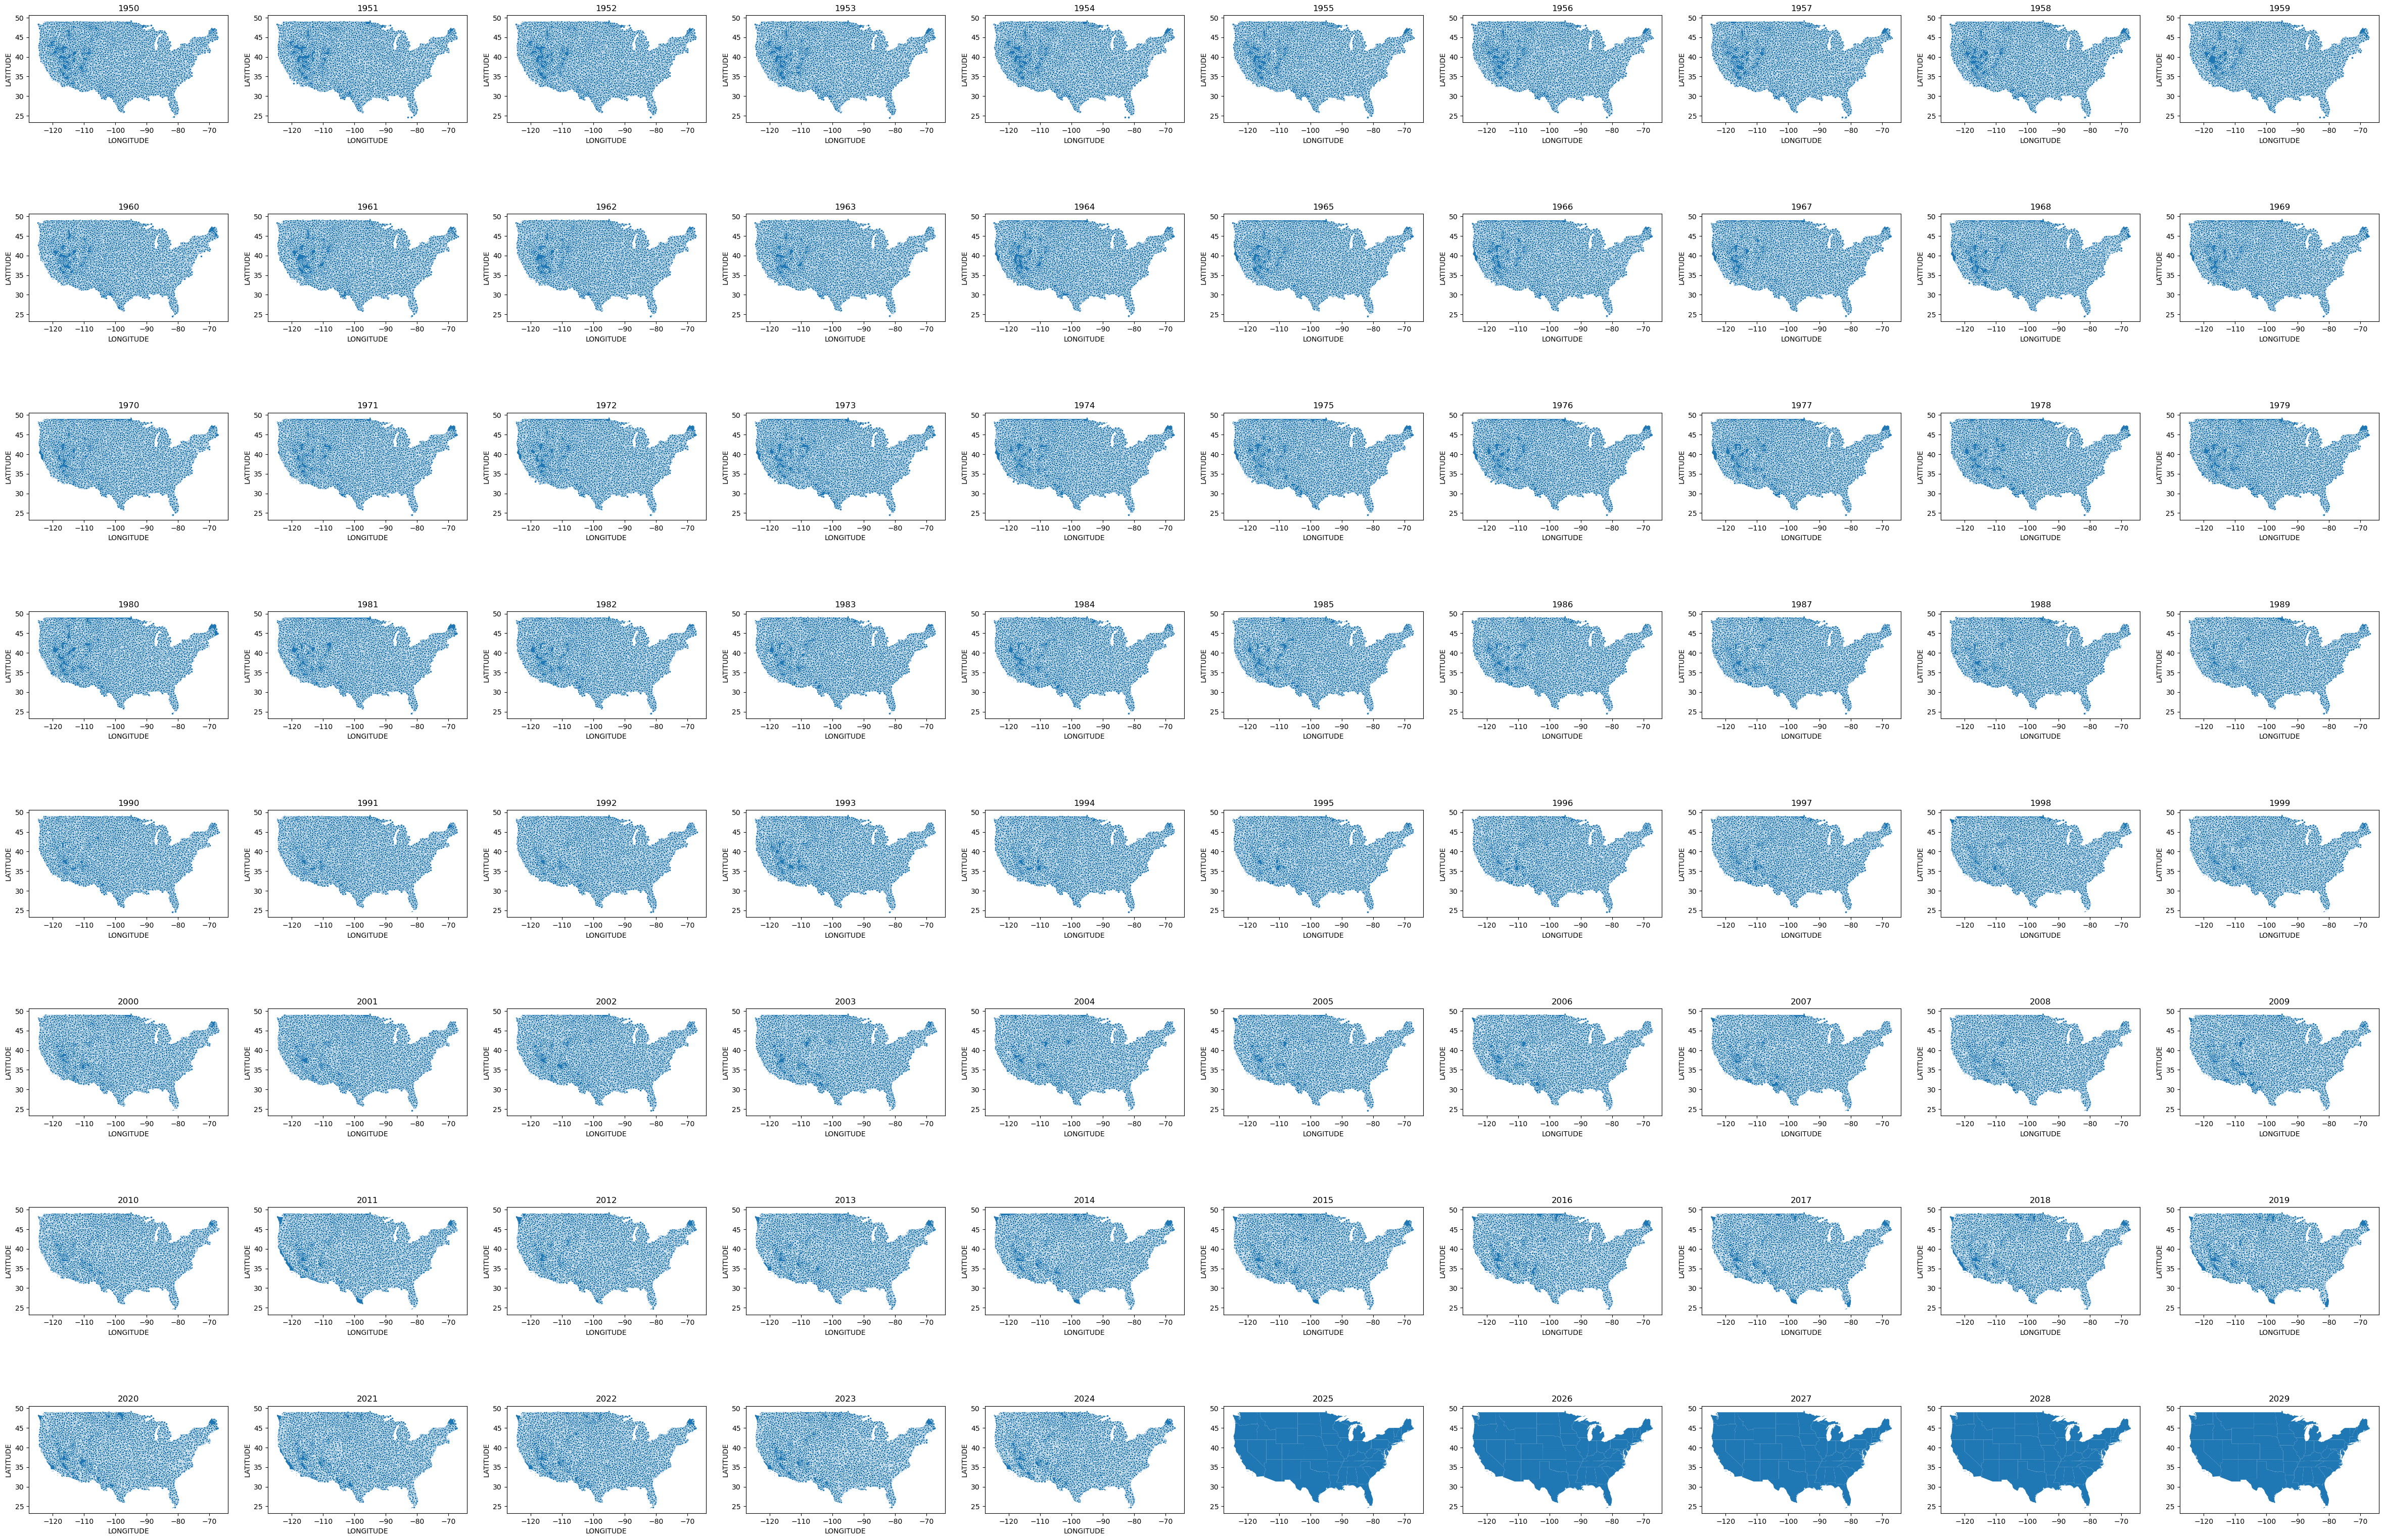

In [420]:
fig, axs = plt.subplots(8,10)
fig.set_size_inches(60,40)

for x in range(10):
    for y in range(8):
        year = 1950 + 10*y + x
        data = output_df[output_df['DATE'] == year]
        ax = axs[y,x]
        states.plot(ax=ax)
        sns.scatterplot(data,x='LONGITUDE',y='LATITUDE',marker='.',ax=ax)
        ax.set_title(str(year))

fig.show()

In [421]:
output_df.to_csv('yearly_climate_data.csv',index=False)